# Workshop #2: Calculus

In [21]:
#importing libraries
import numpy as np
import sympy as sp
import pandas as pd

## Problem 1
Let $f(x) = x^4 - x^3$.
* Find $f'(x)$ and hence find the critical points of the function.
* Using $f''(x)$, establish the nature of the critical points (i.e. if they are min, max, or neither).
* Calculate any local max/min values the function may have.

In [46]:
x = sp.symbols('x')
f = sp.Function('f', real=True)
f = x**4 - x**3

#get the derivative
df = f.diff()

# find the critical point(s)
eq_1 = sp.Eq(df, 0)
crit_pts_1 = sp.solve(eq_1, x)
print('Critical points for f:',crit_pts_1)

max_value= f.subs(x, crit_pts_1[0])
min_value = f.subs(x, crit_pts_1[1])
print(max_value)
print(min_value)

print(f'Funkcijata f postignuva min vo x = {crit_pts_1[1]} i ima minimalna vrednost od f({crit_pts_1[1]}) = {min_value}')

df2 = f.diff(x, 2)
df2

df2.subs(x, crit_pts_1[0])
print(f'df2({crit_pts_1[0]}) = {df2.subs(x, crit_pts_1[0])}=0, so the point x* = {crit_pts_1[0]} is inconclusive' )
df2.subs(x, crit_pts_1[1])
print(f'df2({crit_pts_1[1]}) = {df2.subs(x, crit_pts_1[1])}>0, so the point x* = {crit_pts_1[1]} is a MIN' )

Critical points for f: [0, 3/4]
0
-27/256
Funkcijata f postignuva min vo x = 3/4 i ima minimalna vrednost od f(3/4) = -27/256
df2(0) = 0=0, so the point x* = 0 is inconclusive
df2(3/4) = 9/4>0, so the point x* = 3/4 is a MIN


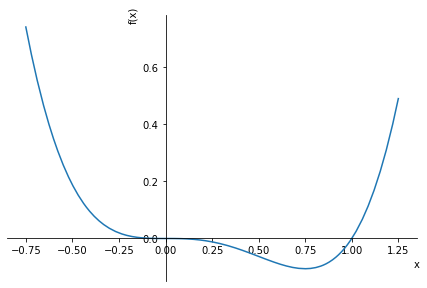

In [48]:
sp.plot(f, (x, -0.75, 1.25))

## Problem 2
A manufacturer has determined that the cost $C$ of operating a factory is given by
\begin{equation}C(x)=0.5x^2+10x+7200,\end{equation}
where $x$ is the number of units produced.
* At what level of production will the **average cost** per unit be minimized? (Note: the average cost is the ratio of the cost of producing $x$ units and $x$, the number of produced units. Once you calculate the minimum average cost, compare it with the minimum cost just for fun)
* What is the minimal average cost per unit produced?

In [125]:
x, c = sp.symbols('x, c')
c = sp.Function('c', real=True)
c = 0.5*x**2 + 10*x +7200
c

0.5*x**2 + 10*x + 7200

In [126]:
avg_c = sp.Function('avg_c', real=True)
avg_c = c / x
avg_c

(0.5*x**2 + 10*x + 7200)/x

In [127]:
#get the derivative
dc = avg_c.diff()
dc

(1.0*x + 10)/x - (0.5*x**2 + 10*x + 7200)/x**2

In [128]:
dc2 = dc.diff()
dc2

1.0/x - 2*(1.0*x + 10)/x**2 + 2*(0.5*x**2 + 10*x + 7200)/x**3

In [129]:
#At what level of production will the average cost per unit be minimized?
# find the critical point(s)
eq_1 = sp.Eq(dc, 0)
crit_pts_1 = sp.solve(eq_1, x)

crit_pts_1 

[-120.000000000000, 120.000000000000]

In [164]:
#What is the minimal average cost per unit produced?
min_value = c.subs(x, crit_pts_1[1]) #ova e minimalnata vrednost
min_value

min_avg_cost_per_unit = min_value/crit_pts_1[1]
print('Minimum average cost per unit is:',min_avg_cost_per_unit)

Minimum average cost per unit is: 130.000000000000


## Problem 3
A crocodile is stalking prey located 20 m further upstream on the opposite bank of a river that is 6 m wide.

Crocodiles travel at different speeds on land and in water.

The time taken for the crocodile to reach its prey can be minimized if it swims to a particular point, $\text{P}$, $x$ meters upstream on the other side of the river as shown in the diagram.

![Crocodile and zebra](crocodile.png)

The time taken, $T$, measured in tenths of a second, for the crocodile to reach its prey is given by
\begin{equation}T(x)=7 \sqrt{36+x^2} + 4(20-x)\end{equation}

* Calculate the time taken if the crocodile does not travel on land.
* Calculate the time taken if the crocodile swims the shortest distance possible.
* Between these two extremes there is one value of $x$ which minimizes the time taken. Find this value of $x$ and the minimum possible time. Use Gradient Descent Method with appropriate choice of $x_0$ and $\alpha$.

In [19]:
x, T = sp.symbols('x T')
T = sp.Function('T', real=True)
T = 7 * sp.sqrt(36 + x**2) + 4 * (20-x)
T

-4*x + 7*sqrt(x**2 + 36) + 80

In [16]:
#Calculate the time taken if the crocodile swims the shortest distance possible.
x = 20
T = 7 * sp.sqrt(36+x**2) + 4 * (20-x)
T.subs(x,20)
T

14*sqrt(109)

In [17]:
x = 0
T = 7 * sp.sqrt(36+x**2) + 4 * (20-x)
T.subs(x,0)
T

122

In [20]:
T = 7 * sp.sqrt(36+x**2) + 4 * (20-x)
dt = T.diff()
dt

7*x/sqrt(x**2 + 36) - 4

In [70]:
Tfunc = sp.lambdify(x, T)
dtfunc = sp.lambdify (x, dt)

# Initialize the results dataframe
results = pd.DataFrame(columns = ["k", "xk", "T(xk)", "T'(xk)"])
results
#Calculate the time taken if the crocodile does not travel on land.
# run the algorithm
max_iter = 500
xk = 20
alpha = 0.1
k = 0

while k <= max_iter: # or we could use a for loop
    # store the latest data in the frame
    data = {'k' : k, 'xk' : xk, 'T(xk)' : Tfunc(xk), "T'(xk)" : dtfunc(xk)}
    results = results.append(data, ignore_index=True)
    
    #update the approximate solution
    xk = xk - alpha * dtfunc(xk)
    
    k = k + 1
    
display(results)

,k,xk,T(xk),T'(xk)
0,0.0,20.000000,146.164291,2.704784e+00
1,1.0,19.729522,145.433731,2.697155e+00
2,2.0,19.459806,144.707324,2.689257e+00
3,3.0,19.190880,143.985207,2.681077e+00
4,4.0,18.922773,143.267518,2.672605e+00
...,...,...,...,...
496,496.0,4.177864,114.467376,5.817569e-13
497,497.0,4.177864,114.467376,5.444534e-13
498,498.0,4.177864,114.467376,5.089262e-13
499,499.0,4.177864,114.467376,4.769518e-13


In [69]:
Tfunc = sp.lambdify(x, T)
dtfunc = sp.lambdify (x, dt)

# Initialize the results dataframe
results = pd.DataFrame(columns = ["k", "xk", "T(xk)", "T'(xk)"])
results
#Calculate the time taken if the crocodile swims the shortest distance possible.
# run the algorithm
max_iter = 500
xk = 0
alpha = 0.1
k = 0

while k <= max_iter: # or we could use a for loop
    # store the latest data in the frame
    data = {'k' : k, 'xk' : xk, 'T(xk)' : Tfunc(xk), "T'(xk)" : dtfunc(xk)}
    results = results.append(data, ignore_index=True)
    
    #update the approximate solution
    xk = xk - alpha * dtfunc(xk)
    
    k = k + 1
    
display(results)

,k,xk,T(xk),T'(xk)
0,0.0,0.000000,122.000000,-4.000000e+00
1,1.0,0.400000,120.493230,-3.534367e+00
2,2.0,0.753437,119.316097,-3.127840e+00
3,3.0,1.066221,118.393112,-2.775263e+00
4,4.0,1.343747,117.665425,-2.470191e+00
...,...,...,...,...
496,496.0,4.177864,114.467376,-8.437695e-15
497,497.0,4.177864,114.467376,-7.105427e-15
498,498.0,4.177864,114.467376,-6.661338e-15
499,499.0,4.177864,114.467376,-5.773160e-15


In [83]:
#Find this value of  𝑥  and the minimum possible time. Use Gradient Descent Method 
#with appropriate choice of  𝑥0  and  𝛼 .

T = sp.Function('T', real=True)
T = 7 * sp.sqrt(36 + x**2) + 4 * (20-x)
dt = T.diff()

Tfunc = sp.lambdify(x, T)
dtfunc = sp.lambdify (x, dt)

# Initialize the results dataframe
results = pd.DataFrame(columns = ["k", "xk", "T(xk)", "T'(xk)"])

# run the algorithm
max_iter = 500
xk = 20
alpha = 0.1
k = 0

while k <= max_iter: # or we could use a for loop
    # store the latest data in the frame
    data = {'k' : k, 'xk' : xk, 'T(xk)' : Tfunc(xk), "T'(xk)" : dtfunc(xk)}
    results = results.append(data, ignore_index=True)
    
    #update the approximate solution
    xk = xk - alpha * dtfunc(xk)
    
    k = k + 1
    
display(results.tail())

,k,xk,T(xk),T'(xk)
496,496.0,4.177864,114.467376,5.817569e-13
497,497.0,4.177864,114.467376,5.444534e-13
498,498.0,4.177864,114.467376,5.089262e-13
499,499.0,4.177864,114.467376,4.769518e-13
500,500.0,4.177864,114.467376,4.458656e-13


## Problem 4
**Newton's method** is an important root-finding algorithm that can also be used for optimization. Given a function $f(x)$ and a **good** initial approximation $x_0$, the sequence $x_1, x_2, \ldots$ generated by the recursive rule:
\begin{equation}x_{k+1} = x_k - \frac{f'(x_k )}{f''(x_k)}\end{equation}
converges to a point $x^*$ that satisfies $f'(x^*) = 0$, i.e. to a minimum of the function.

Write a function that accepts: a function $f$, its derivative $f'$ and second derivative $f''$, a starting point $x_0$, a maximum number of iterations $\text{max_iter}$, and a stopping tolerance $\text{tol}$ as inputs. Implement Newton's method using the recursive relation given above. Your function should return: the approximate minimum $x^*$, the minimum value $f(x^*)$, the absolute value of the derivative at the approximate minimum $|f'(x^*)|$, and the number of iterations computed.

Test the performance of Newton’s method on the function $T(x)$ from **Problem 3.**, using the same initial approximation $x_0$ you used. Compare the performance of the two methods. 

In [171]:
dt2= dt.diff()
print(dt2)
tol = 10^(-6)
print(tol)
xk
k

-7*x**2/(x**2 + 36)**(3/2) + 7/sqrt(x**2 + 36)
-16


501

In [197]:
def Newton_method(T, dt, dt2, xk, max_iter = 4, tol = 1e-6):
    k = 0
    print('k\t\txk\t\tf(xk)\t\tdf(xk)')
    print('-------------------------')
    print(f'{k}\t\t{xk}\t\t{Tfunc(xk)}\t\t{dtfunc(xk)}')
    
    while k <= max_iter and np.abs(Tfunc(xk)) >= tol:
        # update the approximate solution
        k = k + 1
        print(f'{k}\t\t{xk}\t\t{Tfunc(xk)}\t\t{dtfunc(xk)}')
    
    return xk, Tfunc(xk), dtfunc(xk), k

Newton_method (dt2,xk, Tfunc(xk), dtfunc(xk))

k		xk		f(xk)		df(xk)
-------------------------
0		4.1655567883935873e-13		121.99999999999834		-3.999999999999514
1		4.1655567883935873e-13		121.99999999999834		-3.999999999999514
2		4.1655567883935873e-13		121.99999999999834		-3.999999999999514
3		4.1655567883935873e-13		121.99999999999834		-3.999999999999514
4		4.1655567883935873e-13		121.99999999999834		-3.999999999999514
5		4.1655567883935873e-13		121.99999999999834		-3.999999999999514


(4.1655567883935873e-13, 121.99999999999834, -3.999999999999514, 5)

In [228]:
#NOTE: I tried, but it didn't go well :( 